In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [5]:
!cd /content/drive/MyDrive/

In [6]:
!kaggle datasets download -d kartik2112/fraud-detection

fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [8]:
!unzip fraud-detection.zip -d dataset

Archive:  fraud-detection.zip
replace dataset/fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/fraudTest.csv   
  inflating: dataset/fraudTrain.csv  


In [9]:
train_data = pd.read_csv('/content/dataset/fraudTrain.csv', index_col=0)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
test_data = pd.read_csv('/content/dataset/fraudTest.csv', index_col=0)
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [11]:
print("Train shape: ", train_data.shape)
print("Test shape: ", test_data.shape)

Train shape:  (1296675, 22)
Test shape:  (555719, 22)


### EDA and Feature Engineering

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [13]:
train_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
test_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing values.

In [15]:
for column in train_data:
  print(column, ': ', train_data[column].nunique())
  # print(raw_train[column].unique(),"\n")

trans_date_trans_time :  1274791
cc_num :  983
merchant :  693
category :  14
amt :  52928
first :  352
last :  481
gender :  2
street :  983
city :  894
state :  51
zip :  970
lat :  968
long :  969
city_pop :  879
job :  494
dob :  968
trans_num :  1296675
unix_time :  1274823
merch_lat :  1247805
merch_long :  1275745
is_fraud :  2


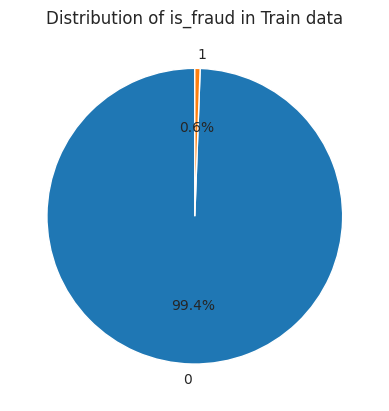

In [16]:
value_counts = train_data['is_fraud'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of is_fraud in Train data')
plt.show()

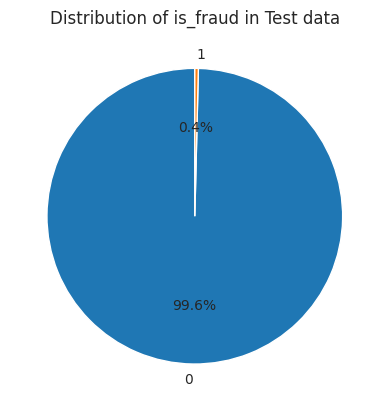

0    553574
1      2145
Name: is_fraud, dtype: int64


In [17]:
value_counts = test_data['is_fraud'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of is_fraud in Test data')
plt.show()
print(value_counts)

So imbalanced! Both train and test dataset are similarly imbalanced.

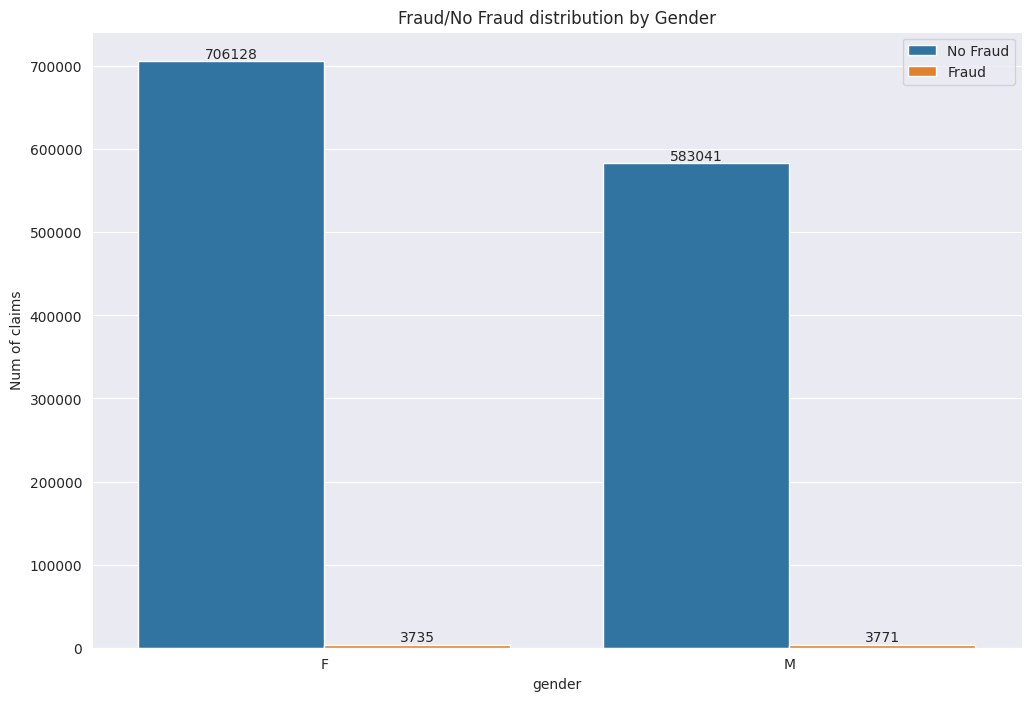

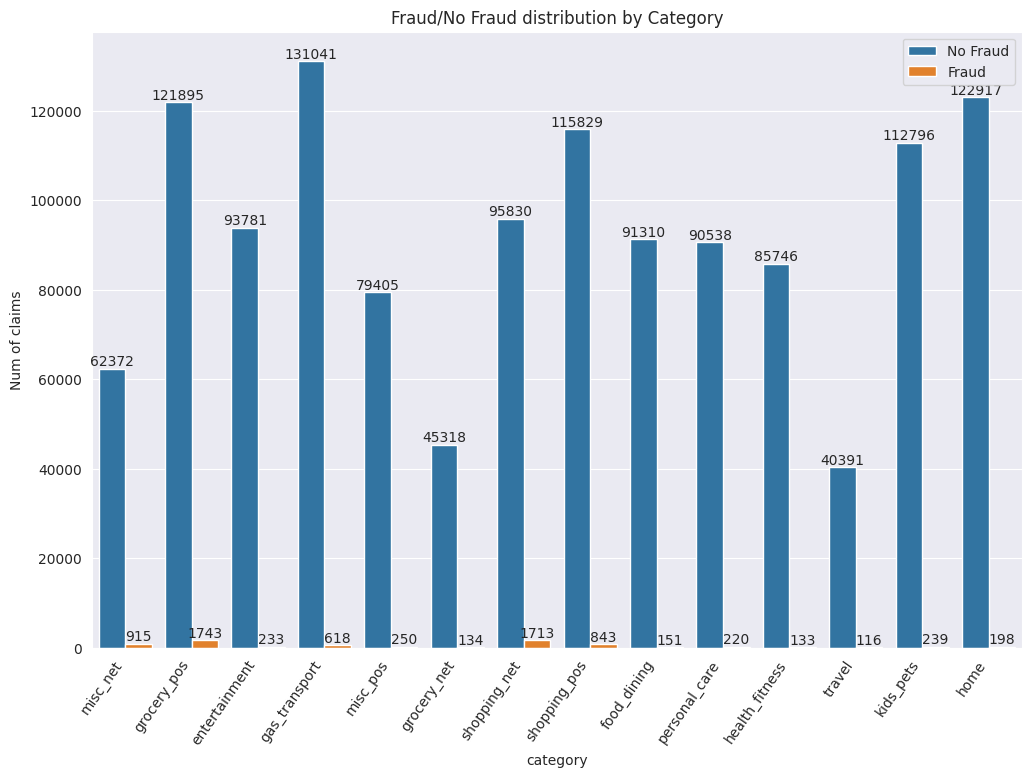

In [18]:
plt.figure(figsize=(12, 8))
labels = ['No Fraud', 'Fraud']

fig = sns.countplot(x='gender', hue ='is_fraud', data=train_data)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Gender')

plt.ylabel('Num of claims')
plt.show()


plt.figure(figsize=(12, 8))
fig = sns.countplot(x='category', hue ='is_fraud', data=train_data)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.xticks(rotation=55, ha='right')
plt.title('Fraud/No Fraud distribution by Category')

plt.ylabel('Num of claims')
plt.show()

In [19]:
for value in train_data['gender'].unique():
  no, yes = train_data[train_data['gender'] == value]['is_fraud'].value_counts()
  print("Fraud rate by", value,": ", round(yes/(no + yes), 2))

Fraud rate by F :  0.01
Fraud rate by M :  0.01


In [20]:
for value in train_data['category'].unique():
  no, yes = train_data[train_data['category'] == value]['is_fraud'].value_counts()
  print("Fraud rate by", value,": ", round(yes/(no + yes), 2))

Fraud rate by misc_net :  0.01
Fraud rate by grocery_pos :  0.01
Fraud rate by entertainment :  0.0
Fraud rate by gas_transport :  0.0
Fraud rate by misc_pos :  0.0
Fraud rate by grocery_net :  0.0
Fraud rate by shopping_net :  0.02
Fraud rate by shopping_pos :  0.01
Fraud rate by food_dining :  0.0
Fraud rate by personal_care :  0.0
Fraud rate by health_fitness :  0.0
Fraud rate by travel :  0.0
Fraud rate by kids_pets :  0.0
Fraud rate by home :  0.0


In [21]:
train_data[train_data['is_fraud'] == 1]['state'].value_counts().head(10)

NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
Name: state, dtype: int64

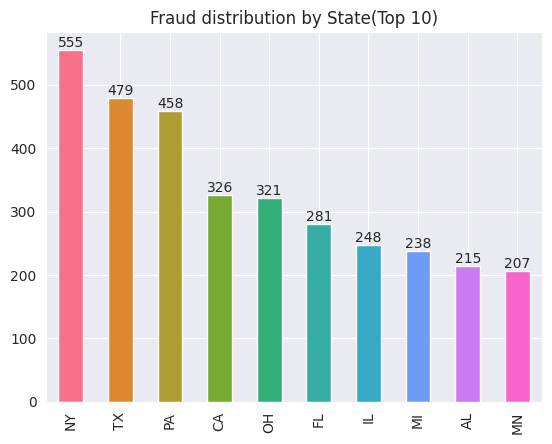

In [22]:
fig = train_data[train_data['is_fraud'] == 1]['state'].value_counts(sort=True, ascending=False).head(10).plot(kind="bar", color=sns.color_palette('husl', 10))
fig.bar_label(fig.containers[0], label_type='edge')
plt.title('Fraud distribution by State(Top 10)')
plt.show()

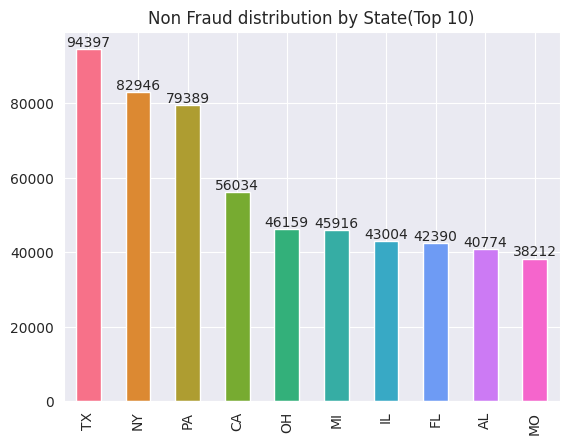

In [23]:
fig = train_data[train_data['is_fraud'] == 0]['state'].value_counts(sort=True, ascending=False).head(10).plot(kind="bar", color=sns.color_palette('husl', 10))
fig.bar_label(fig.containers[0], label_type='edge')
plt.title('Non Fraud distribution by State(Top 10)')
plt.show()

NY, TX and PA are the states with the most transactions(whether fraud or not). So it seems 'state' is not much of a good predictor!

In [24]:
#Calculate distance between merchant and home location
train_data['latitudinal_distance'] = abs(round(train_data['merch_lat']-train_data['lat'],3))
train_data['longitudinal_distance'] = abs(round(train_data['merch_long']-train_data['long'],3))

In [25]:
train_data['trans_datetime'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

In [26]:
train_data['age'] = (train_data['trans_datetime'] - train_data['dob']).dt.days // 365
train_data['dow'] = train_data['trans_datetime'].dt.dayofweek # 0 to 6
train_data['trans_hour'] = train_data['trans_datetime'].dt.hour
train_data['trans_month'] = train_data['trans_datetime'].dt.month
train_data['trans_year'] = train_data['trans_datetime'].dt.year

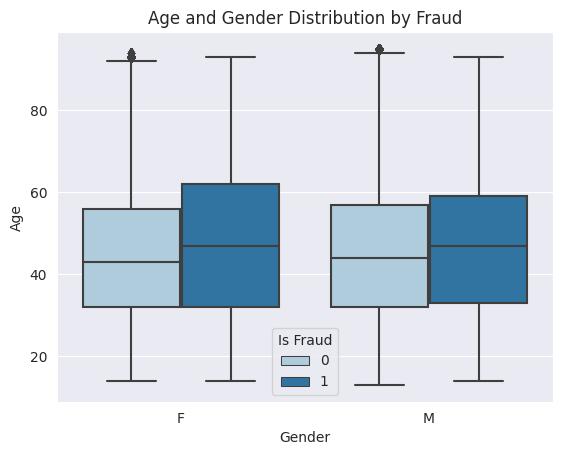

In [27]:
sns.boxplot(x='gender', y='age', hue='is_fraud', data=train_data, palette='Paired')
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()


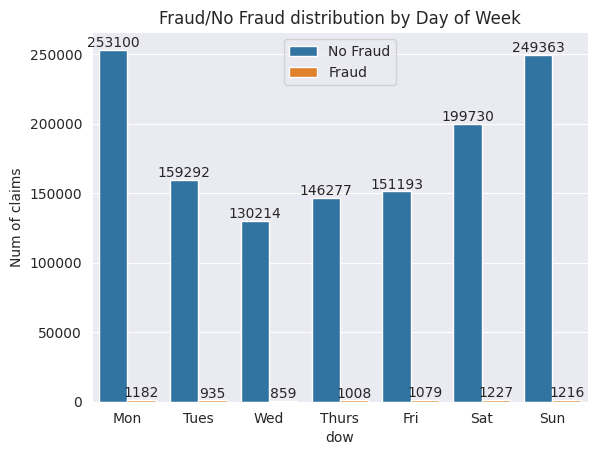

In [28]:
labels = ['No Fraud', 'Fraud']
value_counts = train_data[train_data['is_fraud'] == 1]['dow'].value_counts().sort_index()

fig = sns.countplot(x='dow', hue ='is_fraud', data=train_data)
fig.bar_label(fig.containers[0], label_type='edge');
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Day of Week')

plt.xticks(value_counts.index, ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.ylabel('Num of claims')
plt.show()

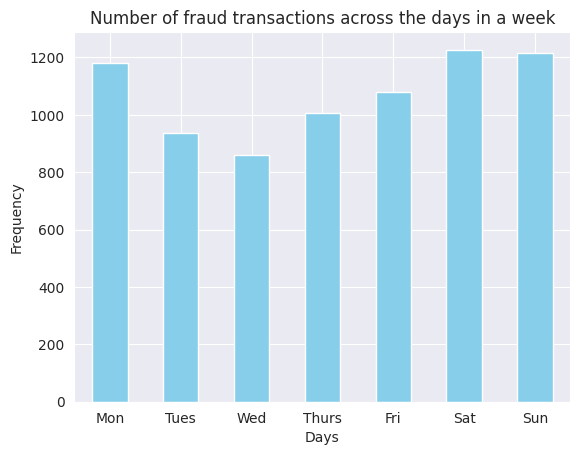

In [29]:
value_counts.plot(kind='bar', color='skyblue')
plt.title('Number of fraud transactions across the days in a week')
plt.ylabel('Frequency')
plt.xlabel('Days')

plt.xticks(value_counts.index, ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.show()


More fraudulent transactions on the weekend!

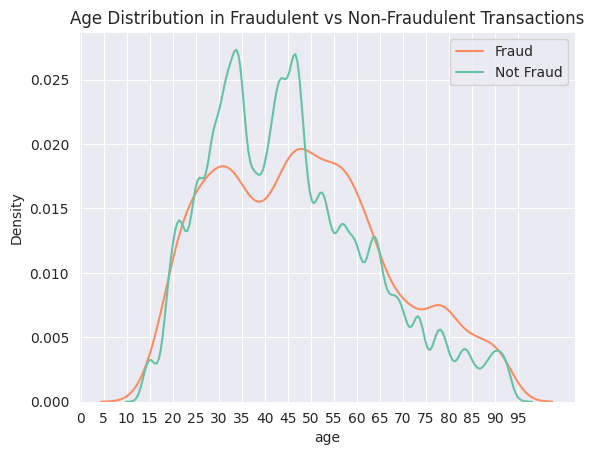

In [30]:
sns.kdeplot(x='age',data=train_data, hue='is_fraud', common_norm=False, palette='Set2')
plt.xticks(np.arange(0, 100, 5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(labels=['Fraud', 'Not Fraud'])
plt.show()



We can observe that in non-fraudulent transactions, there is a peak around 35 years and 40 years, and another one around 50 years. On the other hand, in fraudulent operations, we observe a smoother distribution, with peaks around 35 years and in the range of 50 years to 55 years.


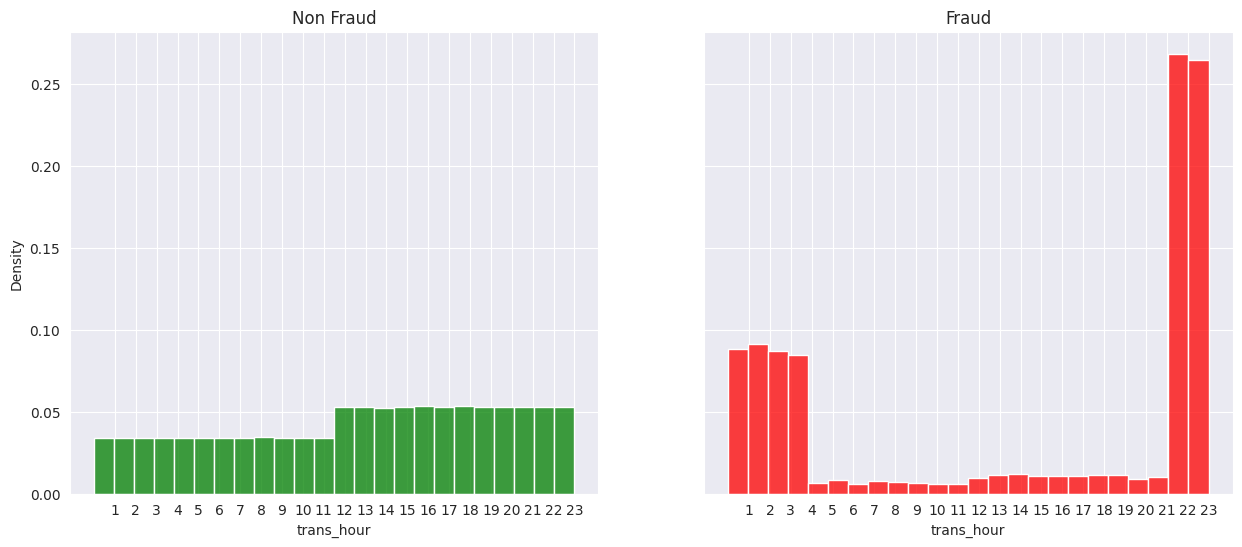

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='trans_hour', data=train_data[train_data['is_fraud'] == 0],
                   stat="density", bins=24, ax=ax1, color='green')
ax2 = sns.histplot(x='trans_hour', data=train_data[train_data['is_fraud'] == 1],
                   stat="density", bins=24, ax=ax2, color="red")
ax1.set_title("Non Fraud")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

As we can see, there is a clear pattern regarding hours in the day. Fraudulent payments happen more frequently around midnight than in normal transactions.

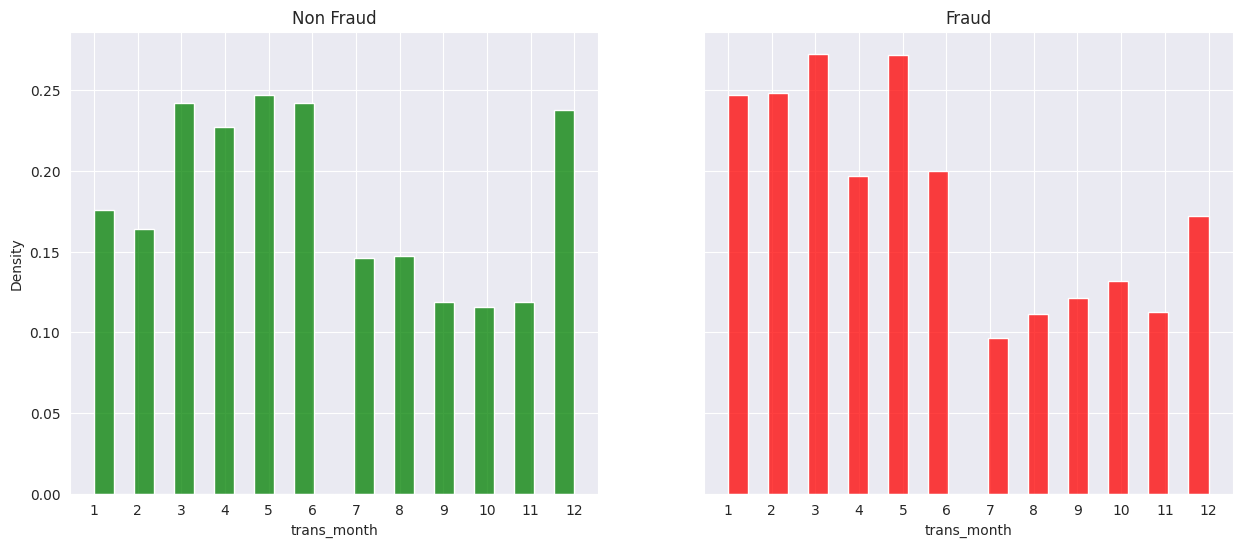

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='trans_month', data=train_data[train_data['is_fraud'] == 0],
                   stat="density", bins=24, ax=ax1, color='green')
ax2 = sns.histplot(x='trans_month', data=train_data[train_data['is_fraud'] == 1],
                   stat="density", bins=24, ax=ax2, color="red")
ax1.set_title("Non Fraud")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13));

More fraudulent transactions in the first half of a year!

In [33]:
def add_traces(df, x, y,hue, mode, cmap, showlegend=None):
    name_map = {1:"Yes", 0:"No"}
    traces = []
    for flag in df[hue].unique():
        traces.append(
            go.Scatter(
                x=df[df[hue]==flag][x],
                y=df[df[hue]==flag][y],
                mode=mode,
                marker=dict(color=cmap[flag]),
                showlegend=showlegend,
                name=name_map[flag]
            )
        )
    return traces

In [34]:
groups = [pd.Grouper(key="trans_datetime", freq="1W"), "is_fraud"]
df_ = train_data.groupby(by=groups).agg({"amt":'mean',"trans_num":"count"}).reset_index()

In [35]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Amount over time", "Number of transactions over time")
                   )

ntraces = add_traces(df=df_,x='trans_datetime',y='amt',hue='is_fraud',mode='lines',
                    showlegend=True, cmap=['purple','orange'])

for trace in ntraces:
    fig.add_trace(
        trace,
        row=1,col=1
    )

ntraces = add_traces(df=df_,x='trans_datetime',y='trans_num',hue='is_fraud',mode='lines',
                    showlegend=False, cmap=['purple','orange'])
for trace in ntraces:
    fig.add_trace(
        trace,
        row=1,col=2
    )

fig.update_layout(height=600,
                  width=1400,
                  legend=dict(title='Is fraud?'),
                  plot_bgcolor='#fafafa',
                  title='Overview',
                  hovermode='x unified'
                 )

fig.show()

In [36]:
groups = ['is_fraud','job']
df_ = train_data.groupby(by=groups).agg({"amt":'mean',"trans_num":"count"}).fillna(0).reset_index()

# Top 10 jobs had most fraud transactions.
df_ = df_[df_['is_fraud'] == 1].sort_values(by='trans_num',
                                       ascending=False).drop_duplicates('job', keep='first').iloc[:10, :]

df_.rename(columns={'amt':'Average Amount', 'trans_num': 'Number of Transactions'}, inplace=True)
df_

,is_fraud,job,Average Amount,Number of Transactions
731,1,Materials engineer,561.092097,62
903,1,Trading standards officer,478.137143,56
752,1,Naval architect,653.563962,53
642,1,Exhibition designer,524.067255,51
871,1,"Surveyor, land/geomatics",510.914800,50
732,1,Mechanical engineer,531.585714,49
791,1,Prison officer,453.897500,48
820,1,Quantity surveyor,591.754167,48
512,1,Audiological scientist,660.311739,46
854,1,Senior tax professional/tax inspector,629.589778,45


In [37]:
groups = ['is_fraud','category']
df_ = train_data.groupby(by=groups).agg({"amt":'mean',"trans_num":"count"}).fillna(0).reset_index()

# Top 10 categories had most fraud transactions.
df_ = df_[df_['is_fraud'] == 1].sort_values(by='trans_num',
                                       ascending=False).drop_duplicates('category', keep='first').iloc[:10, :]

df_.rename(columns={'amt':'Average Amount', 'trans_num': 'Number of Transactions'}, inplace=True)
df_

,is_fraud,category,Average Amount,Number of Transactions
18,1,grocery_pos,311.989616,1743
25,1,shopping_net,999.254939,1713
22,1,misc_net,797.012852,915
26,1,shopping_pos,876.921815,843
16,1,gas_transport,12.288204,618
23,1,misc_pos,218.284080,250
21,1,kids_pets,18.121674,239
14,1,entertainment,503.535579,233
24,1,personal_care,26.170545,220
20,1,home,257.432626,198


Let's do the changes on test data too.

In [38]:
test_data['latitudinal_distance'] = abs(round(test_data['merch_lat']-test_data['lat'],3))
test_data['longitudinal_distance'] = abs(round(test_data['merch_long']-test_data['long'],3))

test_data['trans_datetime'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

test_data['age'] = (test_data['trans_datetime'] - test_data['dob']).dt.days // 365
test_data['dow'] = test_data['trans_datetime'].dt.dayofweek # 0 to 6
test_data['trans_hour'] = test_data['trans_datetime'].dt.hour
test_data['trans_month'] = test_data['trans_datetime'].dt.month
test_data['trans_year'] = test_data['trans_datetime'].dt.year

Drop irrelevent columns.

In [39]:
train_data2 = train_data.copy()
test_data2 = test_data.copy()

In [40]:
drop_columns = ['trans_date_trans_time', 'cc_num', 'trans_num', 'merchant',
                'first', 'last', 'street', 'city', 'lat', 'long', 'job', 'dob',
                'merch_lat', 'merch_long', 'trans_datetime', 'unix_time', 'state']
train_data2.drop(columns=drop_columns,inplace=True)
test_data2.drop(columns=drop_columns,inplace=True)

**Encoding**

In [41]:
train_data2['gender'] = train_data2['gender'].apply(lambda x: 1 if x=="M" else 0)
test_data2['gender'] = test_data2['gender'].apply(lambda x: 1 if x=="M" else 0)

In [42]:
#One Hot Encoding of Category column
train_data2 = pd.get_dummies(train_data2, columns=['category'], drop_first=True)
test_data2 = pd.get_dummies(test_data2, columns=['category'], drop_first=True)

In [43]:
train_data2.head()

,amt,gender,zip,city_pop,is_fraud,latitudinal_distance,longitudinal_distance,age,dow,trans_hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,28654,3495,0,0.068,0.870,30,1,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,99160,149,0,0.271,0.024,40,1,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,83252,4154,0,0.970,0.108,56,1,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,59632,1939,0,0.804,0.447,52,1,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,24433,99,0,0.254,0.830,32,1,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   zip                      1296675 non-null  int64  
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   latitudinal_distance     1296675 non-null  float64
 6   longitudinal_distance    1296675 non-null  float64
 7   age                      1296675 non-null  int64  
 8   dow                      1296675 non-null  int64  
 9   trans_hour               1296675 non-null  int64  
 10  trans_month              1296675 non-null  int64  
 11  trans_year               1296675 non-null  int64  
 12  category_food_dining     1296675 non-null  uint8  
 13  category_gas_transport   1296675 non-null 

In [45]:
test_data2.head()

,amt,gender,zip,city_pop,is_fraud,latitudinal_distance,longitudinal_distance,age,dow,trans_hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,29209,333497,0,0.020,0.265,52,6,12,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,84002,302,0,0.870,0.476,30,6,12,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,11710,34496,0,0.177,0.660,49,6,12,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,32780,54767,0,0.243,0.064,32,6,12,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,49632,1126,0,0.706,0.868,65,6,12,...,0,0,0,0,0,0,0,0,0,1


### Split Data

In [46]:
X_train = train_data2.drop('is_fraud', axis=1)
y_train = train_data2['is_fraud']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_test = test_data2.drop('is_fraud', axis=1)
y_test = test_data2['is_fraud']

### Standardization

In [47]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handle Data Imbalance

In [48]:
smt = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

In [49]:
y_train_resampled.value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

### Model Building

In [50]:
# A function for model evaluation

def evaluate_model(target, predicted, y_score, normalize_matrix= None):
  report = classification_report(target, predicted)
  auc = roc_auc_score(target, y_score)

  print('=========================Confusion Matrix=======================\n')
  confusion = confusion_matrix(target, predicted, normalize=normalize_matrix)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=[False, True])
  cm_display.plot()
  plt.grid(False)
  plt.show()

  print('================================================================\n')
  fpr, tpr, threshold = roc_curve(target, y_score)
  plt.plot(fpr, tpr, label="Model", c="blue")
  plt.plot([0, 1], [0, 1], linestyle="--", c="orange")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()

  print('===========================Report===============================\n')
  print(report)
  return None

#### Logestic Regression

=========================Confusion Matrix=======================



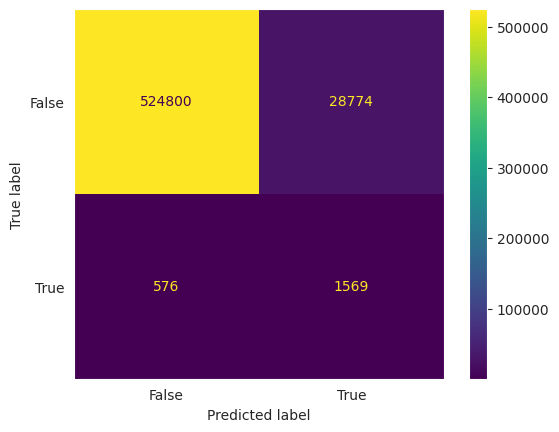

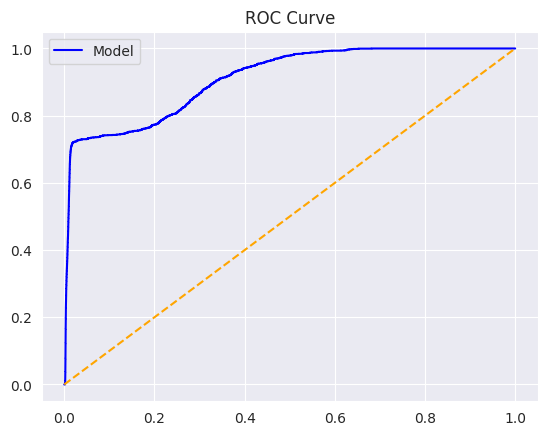

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.73      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.53    555719
weighted avg       1.00      0.95      0.97    555719



In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

y_pred = lr.predict(X_test)
y_score_test = lr.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)

#### SVM


In [51]:
def stratified_sampling(data, labels, sample_size=5000):
    sampled_data, _, sampled_labels, _ = train_test_split(data, labels, train_size=sample_size, stratify=labels, random_state=42)
    return sampled_data, sampled_labels

In [52]:
X_train_sample, y_train_sample = stratified_sampling(X_train, y_train)
X_train_resampled_sample, y_train_resampled_sample = stratified_sampling(X_train_resampled, y_train_resampled)

**With resampled data**

=========================Confusion Matrix=======================



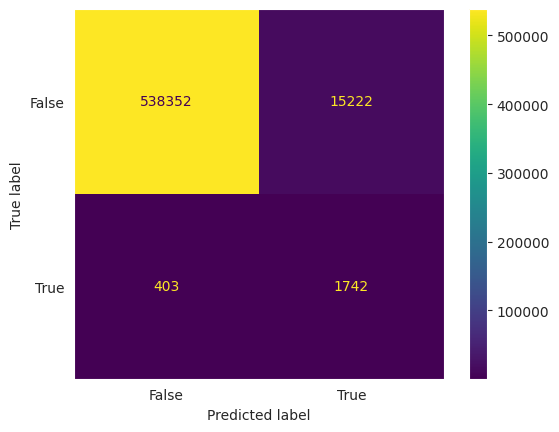

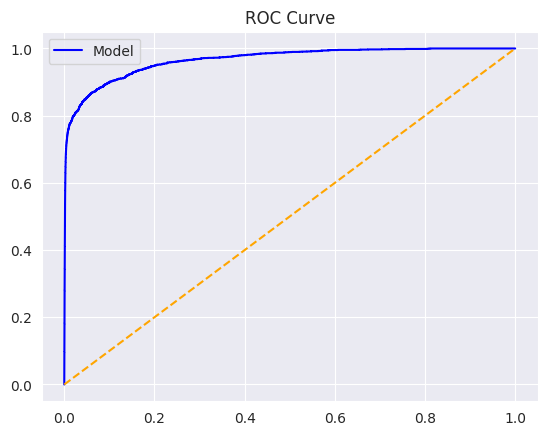

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.10      0.81      0.18      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.89      0.58    555719
weighted avg       1.00      0.97      0.98    555719



In [ ]:
svm = SVC(probability=True)
svm.fit(X_train_resampled_sample, y_train_resampled_sample)

y_pred = svm.predict(X_test)
y_score_test = svm.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)

**With wighted class training**

=========================Confusion Matrix=======================



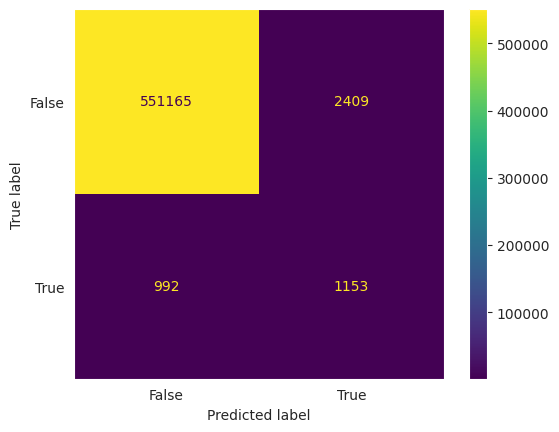

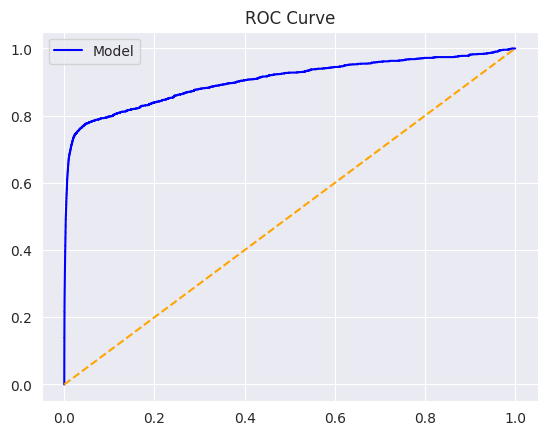

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.32      0.54      0.40      2145

    accuracy                           0.99    555719
   macro avg       0.66      0.77      0.70    555719
weighted avg       1.00      0.99      0.99    555719



In [ ]:
svm = SVC(class_weight='balanced', probability=True)
svm.fit(X_train_sample, y_train_sample)

y_pred = svm.predict(X_test)
y_score_test = svm.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)

#### KNN

=========================Confusion Matrix=======================



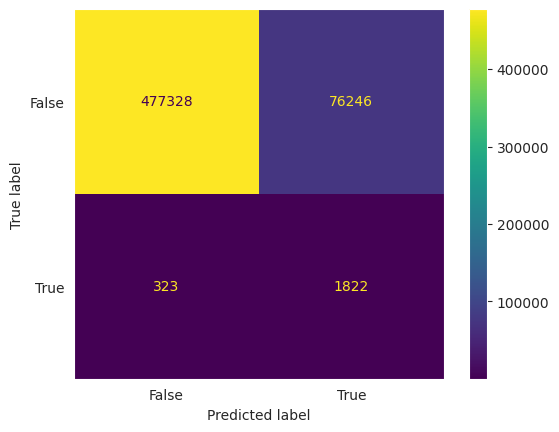

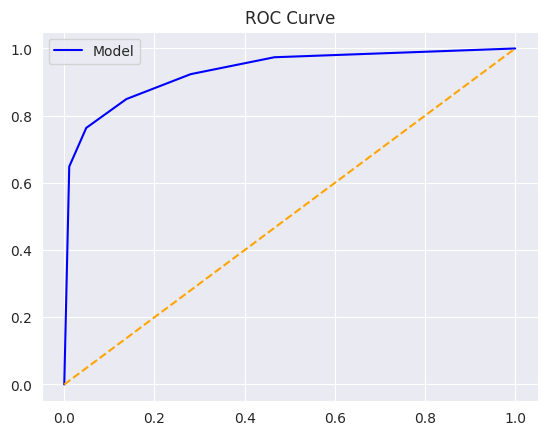

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      0.86      0.93    553574
           1       0.02      0.85      0.05      2145

    accuracy                           0.86    555719
   macro avg       0.51      0.86      0.49    555719
weighted avg       1.00      0.86      0.92    555719



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_resampled_sample, y_train_resampled_sample)

y_pred = knn.predict(X_test)
y_score_test = knn.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)

#### Decision Tree

=========================Confusion Matrix=======================



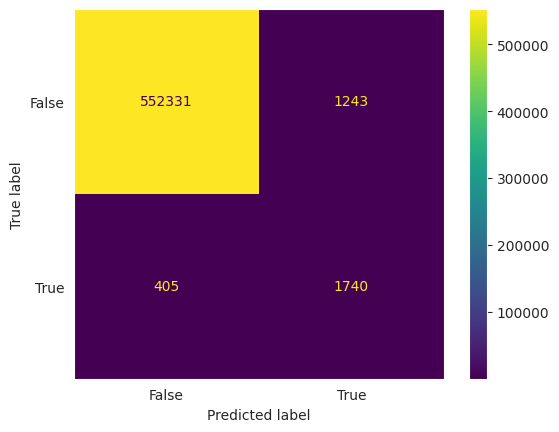

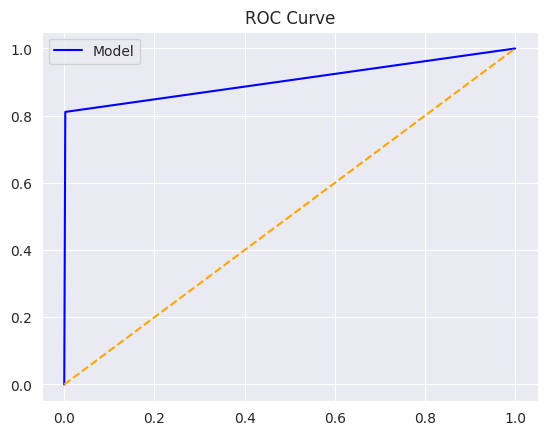

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.58      0.81      0.68      2145

    accuracy                           1.00    555719
   macro avg       0.79      0.90      0.84    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

y_pred = dt.predict(X_test)
y_score_test = dt.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)

**with weighted class training**

=========================Confusion Matrix=======================



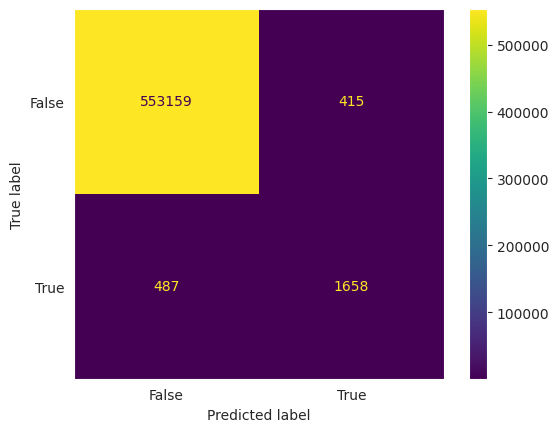

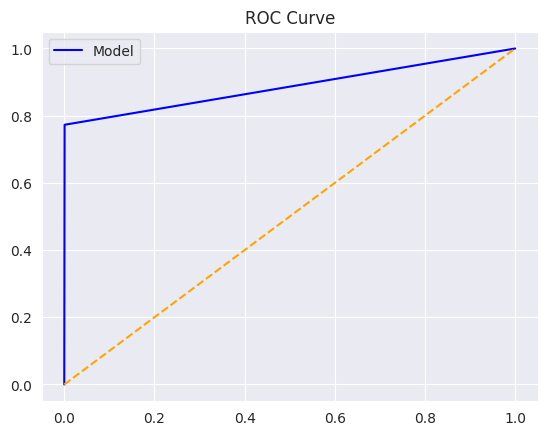

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.80      0.77      0.79      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.89      0.89    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_score_test = dt.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)

Report seems better but ROC curve was a bit better with resampled data(and that's because of recall being better.)

#### Random Forest

=========================Confusion Matrix=======================



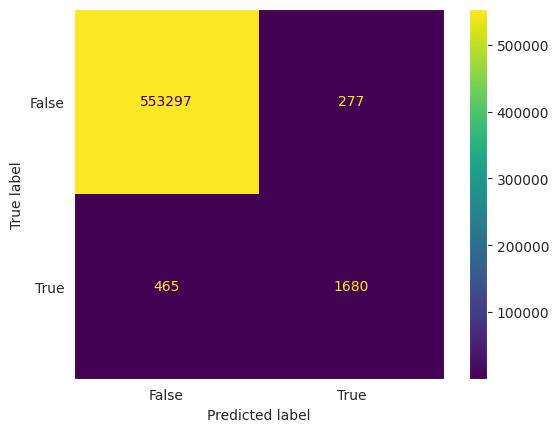

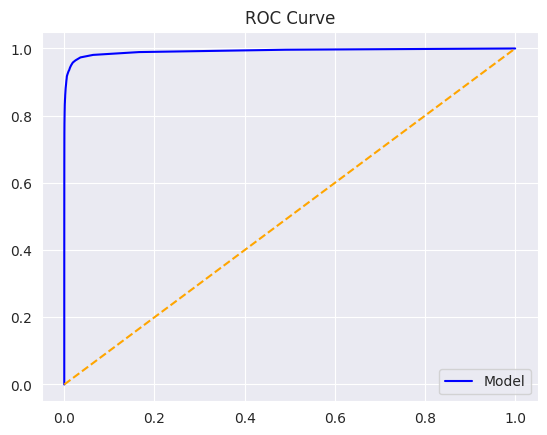

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.86      0.78      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.89      0.91    555719
weighted avg       1.00      1.00      1.00    555719



In [54]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)
y_score_test = rf.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)

#### Naive Bayes

=========================Confusion Matrix=======================



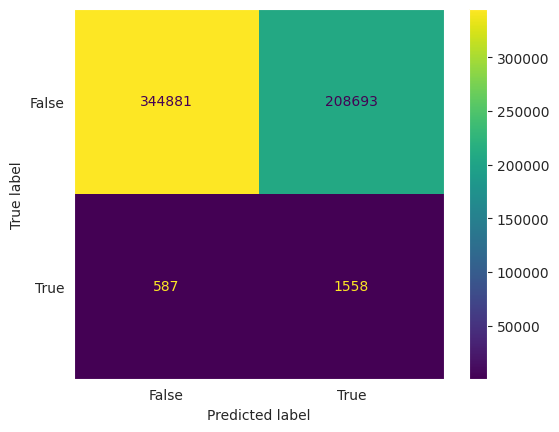

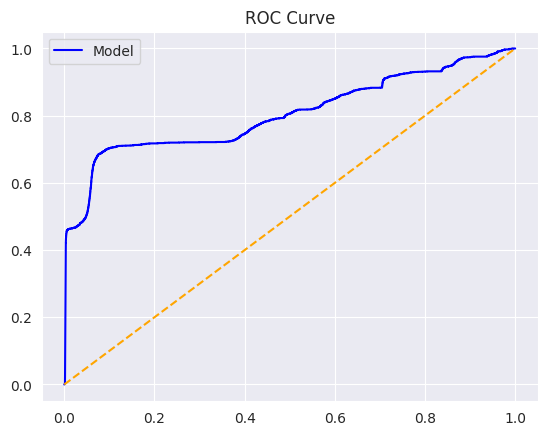

===========================Report===============================

              precision    recall  f1-score   support

           0       1.00      0.62      0.77    553574
           1       0.01      0.73      0.01      2145

    accuracy                           0.62    555719
   macro avg       0.50      0.67      0.39    555719
weighted avg       0.99      0.62      0.76    555719



In [56]:
nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)

y_pred = nb.predict(X_test)
y_score_test = nb.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred, y_score_test)